# Point Sampling

MATSim requires point locations for all activities and trips. More generally it can be useful to assign geometries to activity location and/or trip origin and destinations. This notebook shows how to sample geometric locations from ozone/dzone regions using a simple random point sampler.

More advanced samplers are available in `pam.samplers.spatial`.


In [1]:
import os

import geopandas as gp
import pandas as pd
from matplotlib import pyplot as plt
from pam import read
from pam.samplers.spatial import RandomPointSampler

In [2]:
trips = pd.read_csv(
    os.path.join("data", "example_data", "example_travel_diaries.csv"), index_col="uid"
)
attributes = pd.read_csv(
    os.path.join("data", "example_data", "example_attributes.csv"), index_col="pid"
)
trips.head(10)

,pid,hid,seq,hzone,ozone,dzone,purp,mode,tst,tet,freq
uid,,,,,,,,,,,
0,census_0,census_0,0,Harrow,Harrow,Camden,work,pt,444,473,1000
1,census_0,census_0,1,Harrow,Camden,Harrow,work,pt,890,919,1000
2,census_1,census_1,0,Greenwich,Greenwich,Tower Hamlets,work,pt,507,528,1000
3,census_1,census_1,1,Greenwich,Tower Hamlets,Greenwich,work,pt,1065,1086,1000
4,census_2,census_2,0,Croydon,Croydon,Croydon,work,pt,422,425,1000
5,census_2,census_2,1,Croydon,Croydon,Croydon,work,pt,917,920,1000
6,census_3,census_3,0,Haringey,Haringey,Redbridge,work,pt,428,447,1000
7,census_3,census_3,1,Haringey,Redbridge,Haringey,work,pt,1007,1026,1000
8,census_4,census_4,0,Hounslow,Hounslow,"Westminster,City of London",work,car,483,516,1000


In [3]:
population = read.load_travel_diary(trips, attributes)
population.stats

Using tour based purpose parser (recommended)


Adding pid->hh mapping to persons_attributes from trips.


Adding home locations to persons attributes using trips attributes.


Using freq of 'None' for all persons.


{'num_households': 51,
 'num_people': 51,
 'num_activities': 152,
 'num_legs': 101}

## Sample Geometries
Transform trip ozone/dzone to geographically sampled points

In [4]:
zones = gp.read_file(os.path.join("data", "example_data", "geometry.geojson")).set_index("NAME")
zones.head()

,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
NAME,,,,,,
Kingston upon Thames,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
Croydon,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
Bromley,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
Hounslow,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
Ealing,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [5]:
random_sampler = RandomPointSampler(geoms=zones)

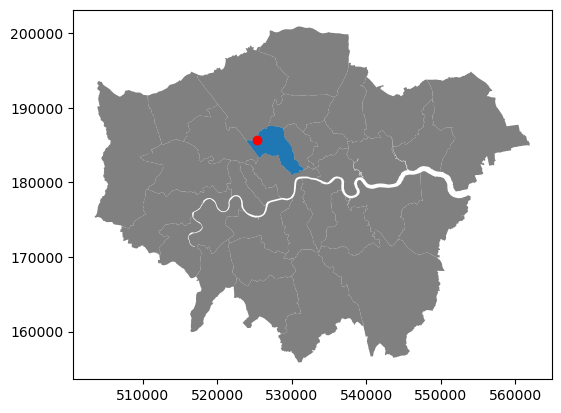

In [6]:
# test
fig, ax = plt.subplots(1)
zones.plot(ax=ax, color="grey")
zones.loc[["Camden"]].plot(ax=ax)
point = random_sampler.sample("Camden", activity=None)
ax.scatter(point.x, point.y, c="red")

In [7]:
population.sample_locs(random_sampler)  # apply to whole population

Let's check out an example Activity Plan and Attributes:

Person: census_0
{'gender': 'female', 'job': 'work', 'occ': 'white', 'inc': 'low', 'hzone': 'Harrow'}
0:	Activity(act:home, location:POINT (516104.2142596701 187104.23657894367), time:00:00:00 --> 07:24:00, duration:7:24:00)
1:	Leg(mode:pt, area:POINT (516104.2142596701 187104.23657894367) --> POINT (528574.2978802138 186510.35985765653), time:07:24:00 --> 07:53:00, duration:0:29:00)
2:	Activity(act:work, location:POINT (528574.2978802138 186510.35985765653), time:07:53:00 --> 14:50:00, duration:6:57:00)
3:	Leg(mode:pt, area:POINT (528574.2978802138 186510.35985765653) --> POINT (516104.2142596701 187104.23657894367), time:14:50:00 --> 15:19:00, duration:0:29:00)
4:	Activity(act:home, location:POINT (516104.2142596701 187104.23657894367), time:15:19:00 --> 00:00:00, duration:8:41:00)


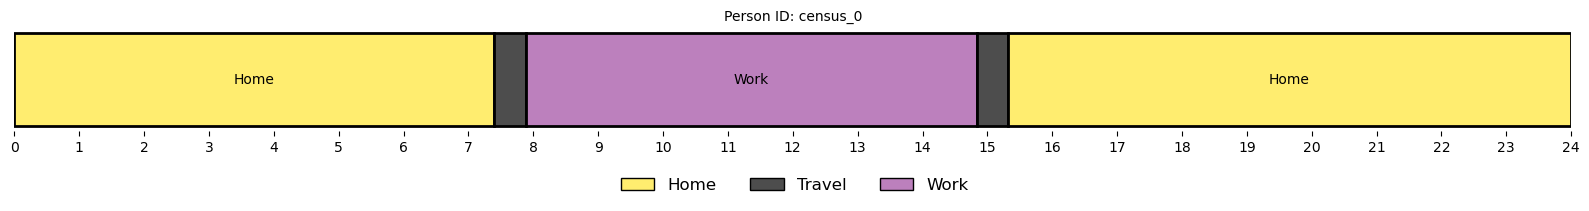

In [8]:
person = population["census_0"]["census_0"]
person.print()
person.plot()